# Feature analysis

We analyse the features and look at what features we are useful and which we can drop. We plot some features and create a heatmap. During the preprocessing step we drop some columns which we found are useless. Next we normalize the dataset and export it.

In [1]:
from SimpleCV import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing
import pandas as pd
from sklearn.externals import joblib

df = pd.read_csv("../dataset-numpy/dataset_features_v4.csv")

#### Describe

visualize the means, standard deviation, minimum, maximum etc of all features.

In [2]:
df.describe()

blob_amount_contours   blob_angle    blob_area  blob_centroid_x  \
count           1920.000000  1920.000000  1920.000000      1920.000000   
mean              44.952083    50.857330   291.653385        15.859298   
std                8.744703    65.489537    67.428881         1.193617   
min               20.000000   -87.878899   153.000000        11.835737   
25%               39.000000    65.718203   244.000000        15.077516   
50%               44.000000    85.236358   275.500000        15.797984   
75%               51.000000    90.000000   326.000000        16.571982   
max               88.000000    90.000000   512.000000        20.410788   

       blob_centroid_y  blob_height   blob_width  centroid_bottom_is_empty  \
count      1920.000000  1920.000000  1920.000000               1920.000000   
mean         15.380416    29.997917    20.457292                  0.348958   
std           1.869070     0.064533     2.035446                  0.476765   
min          10.582800    28.000000    10.000000                  0.000000   
25%          14.116460    30.000000    20.000000                  0.000000   
50%          15.295089    30.000000    20.000000                  0.000000   
75%          16.354908    30.000000    22.000000                  1.000000   
max          20.841542    30.000000    30.000000                  1.000000   

       centroid_is_empty  centroid_top_is_empty     ...          grid_7_0  \
count        1920.000000            1920.000000     ...       1920.000000   
mean            0.295312               0.211458     ...          0.157812   
std             0.456302               0.408449     ...          1.132490   
min             0.000000               0.000000     ...          0.000000   
25%             0.000000               0.000000     ...          0.000000   
50%             0.000000               0.000000     ...          0.000000   
75%             1.000000               0.000000     ...          0.000000   
max             1.000000               1.000000     ...         16.000000   

          grid_7_1     grid_7_2     grid_7_3  grid_7_4     grid_7_5  \
count  1920.000000  1920.000000  1920.000000      1920  1920.000000   
mean      0.149479     0.050521     0.001563         0     0.022917   
std       1.011683     0.464531     0.039508         0     0.246911   
min       0.000000     0.000000     0.000000         0     0.000000   
25%       0.000000     0.000000     0.000000         0     0.000000   
50%       0.000000     0.000000     0.000000         0     0.000000   
75%       0.000000     0.000000     0.000000         0     0.000000   
max      16.000000     8.000000     1.000000         0     6.000000   

          grid_7_6     grid_7_7  number_of_holes        label  
count  1920.000000  1920.000000      1920.000000  1920.000000  
mean      0.182292     0.288542         0.377083     4.532813  
std       0.891801     1.539500         0.574330     2.868122  
min       0.000000     0.000000         0.000000     0.000000  
25%       0.000000     0.000000         0.000000     2.000000  
50%       0.000000     0.000000         0.000000     5.000000  
75%       0.000000     0.000000         1.000000     7.000000  
max      12.000000    16.000000         2.000000     9.000000  

[8 rows x 76 columns]

In [3]:
colors = cm.plasma(np.linspace(0, 1, 10))

#### Blob height
There could be some minimal difference in heights, we do not expect this to be enough to use as a feature. We want to be sure of this by visualizing it.

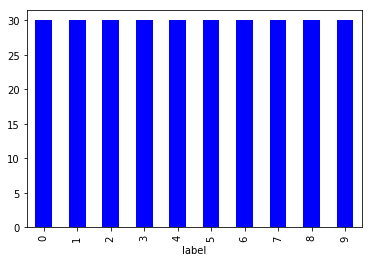

In [4]:
# group the means by label
means = df.groupby('label').mean()

means['blob_height'].plot.bar()

###### Conclusion blob height
As expected, the height for all numbers are exactly the same. This means that blob height can be removed from the feature list because it adds nothing.

#### Blob amount contours
The blob contours represent the contours of every number. The number it shows on the y axis is the mean of the contours per number. The hypothesis is that every number will should have different amount contours that will distinques it from other numbers.

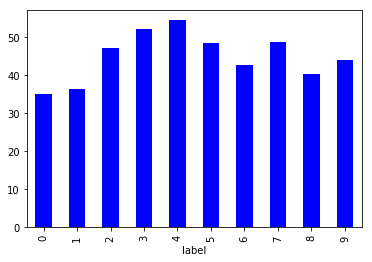

In [5]:


means['blob_amount_contours'].plot.bar()

###### Conclusion blob amount contours
When looking at the bar chart above, you can see that every number has different contour amounts. The 0 is distinguishable from the 4 for example. We implemented this feature and tested it with out classifiers. None of the classifiers' results improved and some got worse results. From this conclusion we decided to drop the amount contours

#### Blob angle
The blob angle shows the angle between the horizontal and the minimum enclosing rectangle of the blob. The horizontal rectangle of the blob are the red lines shown below in the image. The minimum enclosing rectangle are the blue lines shown below. the blob angle shows the angle between these two rectangles. We take the means of the blob angles per label and show it in a bar graph.

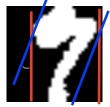

In [6]:
disp = Display(displaytype='notebook')
Image("./blob_angle.jpeg").scale(0.5).save(disp)

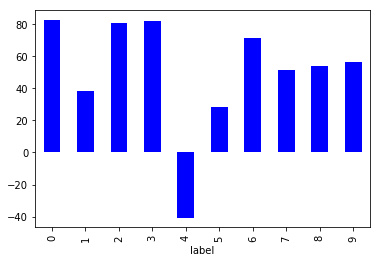

In [7]:
means['blob_angle'].plot.bar()

###### Conclusion blob angle
The angles are very different from each other. The 4 is for example very easy to recognize based on the angle alone. This is a feature we will not drop. 

#### Blob Area
The blob area shows the area of the blob of the number in terms of the amount of pixels. Every number has a different area, this could be used as a feature to distinguish numbers from each other. We take the means of the blob area per label and show it in a bar graph.

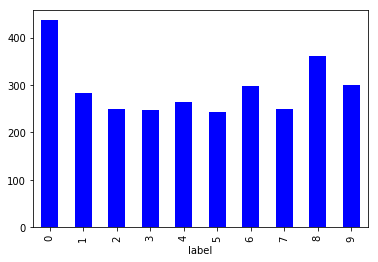

In [8]:
means['blob_area'].plot.bar()

###### Conclusion blob area
Some blob areas are not very distinguishable from each other. But the 0 really stands out from the rest. We will keep this feature in, because it will distinguish some numbers from each other.

#### Blob Width
The blob width is the width of the blob. We expect this to not be very different per number. We show the mean of the blob width per number.

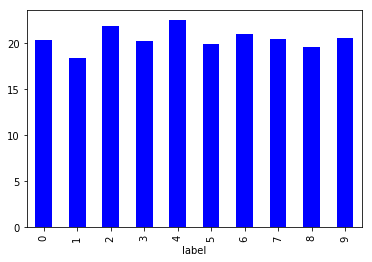

In [9]:
means.blob_width.plot.bar()

##### Conclusion blob width
The widths are not very different from each other, but have some small differences. We ran the classifiers with the features with blob_width and without blob_width. The classifiers had better results when blob_width was in the feature list, so we kept this in.

#### Number of holes 
The hypothesis of the feature "number of holes": The numbers 0/6/9 and 8 can be identified out of the image. 
The number 0,6 and 9 should have 1 hole.
The number 8 should have 2 holes. 
The other numbers should have no holes.

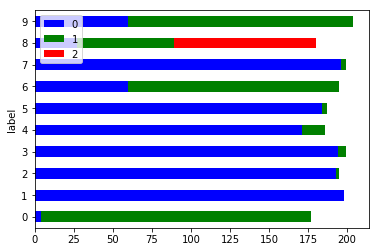

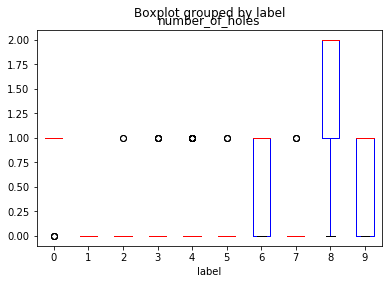

In [10]:
df2 = df.groupby(['number_of_holes', 'label'])['number_of_holes'].count().unstack('number_of_holes').fillna(0)
df2.plot.barh(stacked=True)
plt.legend(loc=2)


df.boxplot(by='label',column='number_of_holes', grid=False)

###### Conclusion Number of holes
When looking at the graph above, it is visible that 8 is the only number with a feature of 2 holes, which is correct. The numbers 0,6 and 9  show a lot of green which is  correct. This makes it unique from the other numbers and it makes "number of holes" a good feature. What is notable is that with the numbers with holes in them, there is also another colour in them, this could be because of bad data, e.g when a 8 is drawn the hole could not have been closed correctly. 

#### Centroid is empty
The hypothesis of the feature "centroid is empty": This feature checks if the middle pixel of the blob(number) is black or white. If the middle pixle is black, the number should be a 0. This should be the case because 0 has a hole on the inside. The other numbers should (with some exceptions like a 4 for example) have a white pixel.


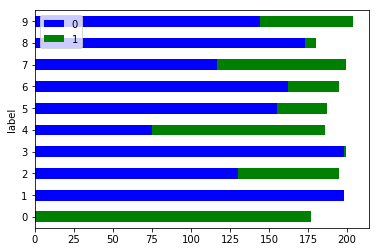

In [11]:
df2 = df.groupby(['centroid_is_empty', 'label'])['centroid_is_empty'].count().unstack('centroid_is_empty').fillna(0)
df2.plot.barh(stacked=True)
plt.legend(loc=2)


###### Conclusion Centroid is empty
In the graph above it is visible that 0 is the only number with a fully green bar. This is as was accepted. So you could say it is a good feature. But it is not as good as expected. Looking at the other numbers, there is also a lot of green visible, and combinations of colours. 

#### Centroid top is empty
The hypothesis of the feature "centroid top is empty": This feature checks if the middel pixel of the top part (blob is cut in half) of the blob(number) is black of white. With this feature it should be clear that if the pixel is black it is the number 9/8/0. This should be the case because 9/8/0 all have holes at the upperhalf. 

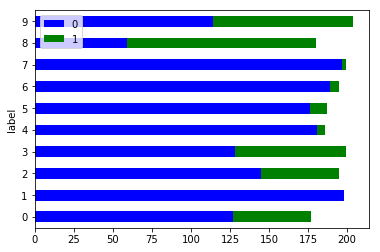

In [12]:
df2 = df.groupby(['centroid_top_is_empty', 'label'])['centroid_top_is_empty'].count().unstack('centroid_top_is_empty').fillna(0)
df2.plot.barh(stacked=True)
plt.legend(loc=2)

###### Conclusion Centroid top is empty
In the graph above it is visible that there is not one number that really stands out. It was expected that 9 would stand out, but if we look at the graph and think about it know. There are a lot more numbers where the top is 'empty'. This could still be used as a feature, but is not as good as was first thought.

#### Centroid bottom is empty
The hypothesis of the feature "centroid bottom is empty": This feature checks if the middel pixel of the bottom part (blob is cut in half) of the blob(number) is black of white. With this feature it should be clear that if the pixel is black it is the number 6/8/0. This should be the case because 6/8/0 all have a hole at the lower half. 

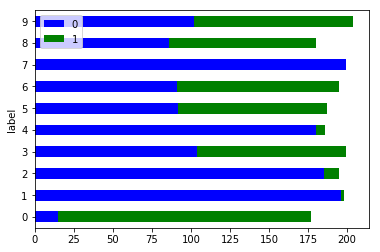

In [13]:
df2 = df.groupby(['centroid_bottom_is_empty', 'label'])['centroid_bottom_is_empty'].count().unstack('centroid_bottom_is_empty').fillna(0)
df2.plot.barh(stacked=True)
plt.legend(loc=2)

###### Conclusion Centroid bottom is empty
In the graph above it is visible that the numbers that were expected to stand out don't. The number 0 does, but 8 and 6 are around 50/50 on empty and filled. There are also numbers where the focus was not on, but which did well 7,4,2 and 1, this could also be usefull information. This feature did not give the expected output but gave new unexpected usefull info. 

#### Centroid

These scatter plots show the location of the centroid in the image. This is different per image, we will explain some further below.

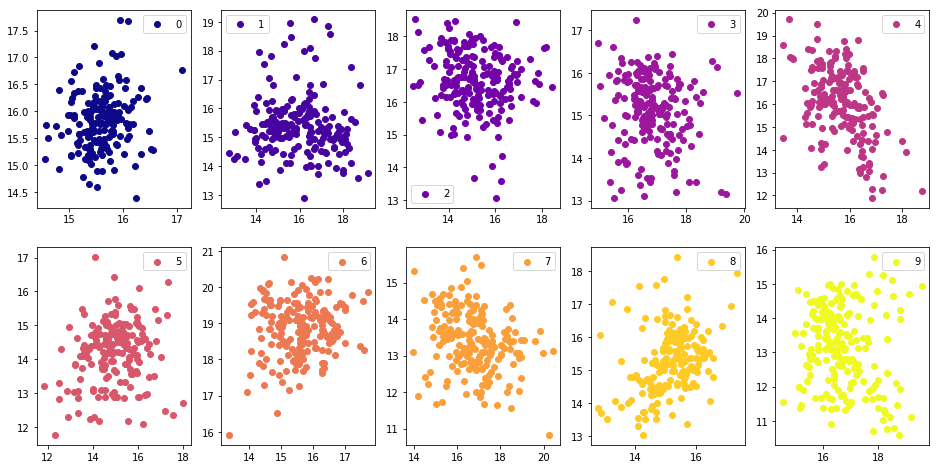

In [27]:
# colours
colors = cm.plasma(np.linspace(0, 1, 10))

fig, axs = plt.subplots(2, int(10 / 2), figsize=(16,8))

for i in range(10):
    sub_fig = axs[1 if i > (10 / 2.0 - 1) else 0][int(i % (10 / 2))]
    centroid = df[(df.label == i)]
    xCentroid = centroid.blob_centroid_x
    yCentroid = centroid.blob_centroid_y
    sub_fig.scatter(x=xCentroid, y= yCentroid, c=colors[i], label=i)
    sub_fig.legend()

#### Centroid of the 6 and 9. 
We can see that there is a distinct difference. We can differentiate the 6 and the 9 by eye already based on these features.

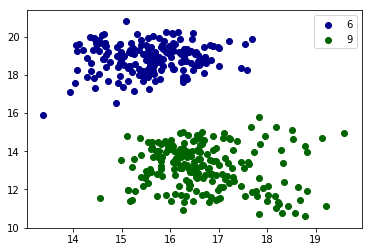

In [15]:
centroid6 = df[(df.label == 6)]
xCentroid6 = centroid6.blob_centroid_x
yCentroid6 = centroid6.blob_centroid_y
centroid9 = df[(df.label == 9)]
xCentroid9 = centroid9.blob_centroid_x
yCentroid9 = centroid9.blob_centroid_y
plt.scatter(x= xCentroid6, y= yCentroid6, c='DarkBlue', label = 6)
plt.scatter(x= xCentroid9, y= yCentroid9, c='DarkGreen', label = 9)
plt.legend()

#### Centroid of the 8 and 0

Here we cannot see a distinctive difference between the 8 and the 0. The 8 has more wide spread scatters while the 0 is grouped together.

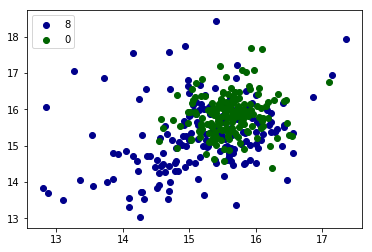

In [16]:
centroid8 = df[(df.label == 8)]
xCentroid8 = centroid8['blob_centroid_x']
yCentroid8 = centroid8['blob_centroid_y']
centroid0 = df[(df.label == 0)]
xCentroid0 = centroid0['blob_centroid_x']
yCentroid0 = centroid0['blob_centroid_y']
plt.scatter(x= xCentroid8, y= yCentroid8, c='DarkBlue', label = 8)
plt.scatter(x= xCentroid0, y= yCentroid0, c='DarkGreen', label = 0)
plt.legend()


#### Heatmap of all the numbers

In this heatmap we can clearly see the numbers displayed. The feature used here is the grid_n_n_. This feature counts the amount of filled pixels in a 4x4 grid piece. We take the mean of all the filled pixels of the grid_n_n and lay it out on the 8x8. The places where the pixels are redder mean that these are more often filled than the places where the pixels are yellow. 

When looking at the describe table and the heatmap something stands out, some parts of the grid are not filled in. In the heatmap this is visible due to the yellow strokes next to the numbers (far left & far right) and in the describe this is visible in the mean - of these corresponding grids-. An option would be to remove these grids out of the feature list. With an iteration through the means of the grids the grids that are under a certain pixel threshold are dropped from the feature list.


In [17]:
size = 8

def mean_weight_matrix(label):
    m = np.zeros((size,size))
    for x in range(size):
        for y in range(size):
            m[x][y] = means["grid_" + str(x) + "_" + str(y)][label]
    return m.T

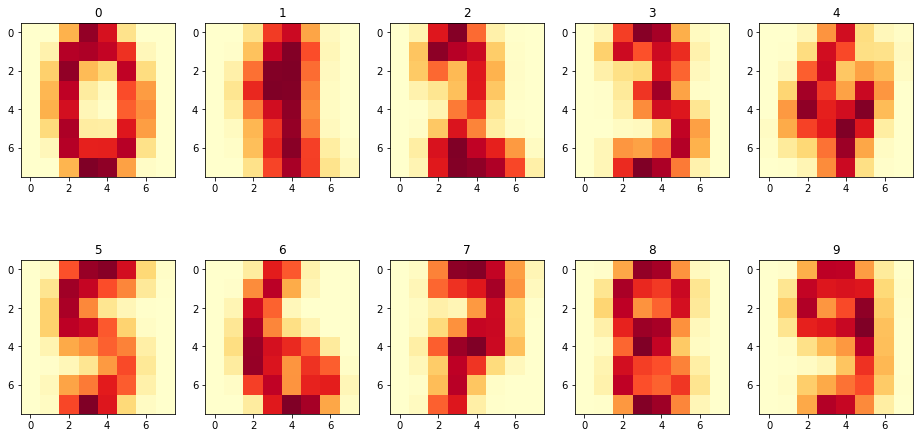

In [18]:
fig, axs = plt.subplots(2, int(10 / 2), figsize=(16,8))

for i in range(10):
    sub_fig = axs[1 if i > (10 / 2.0 - 1) else 0][int(i % (10 / 2))]
    sub_fig.set_title(str(i))
    sub_fig.imshow(mean_weight_matrix(i), cmap='YlOrRd')

# preprocessing

- We drop useless columns
- We normalize the features and save them to csv

We are dropping blob_height, because all the numbers have the same height, so this feature is useless. We are also dropping useless grids where the pixels are almost never filled. With an iteration through the means of the grids the grids that have a mean where less than 5 pixels are filled are dropped from the feature list.

In [19]:
df = df.drop(['blob_height', 'blob_amount_contours'], axis=1)

In [20]:
columnsToDrop = []
normalizeColumns = []

for column in df:
    if(df[column].mean() < 5.0) & ('grid' in column):
        df = df.drop(column, axis=1)
    elif 'label' not in column:
        normalizeColumns.append(column)

Export not normalized version to csv

In [21]:
# df.to_csv("../dataset-numpy/dataset_analysis_v4.csv", sep=',', encoding='utf-8', index=False)

### Normalization

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()

df_normalized = df.copy()

scaled = min_max_scaler.fit_transform(df_normalized[normalizeColumns])
df_normalized[normalizeColumns] = pd.DataFrame(scaled, columns= normalizeColumns)

# export the min_max_scaler for the application
joblib.dump(min_max_scaler, "scaler.joblib")

['scaler.joblib']

export normalized version to csv

In [23]:
df_normalized.to_csv("../dataset-numpy/dataset_analysis_normalized_v4.csv", sep=',', encoding='utf-8', index=False)